# Zoekmachines

## Notebook made by

__Name__|Daniel| en vrienden

__Student id__ : secret , secret


## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar zichtbare tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. De andere tests worden na inleveren toegevoegd aan die cell.

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-3" data-toc-modified-id="Week-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 3</a></span></li><li><span><a href="#Questions-from-Chapter-8-in-MRS" data-toc-modified-id="Questions-from-Chapter-8-in-MRS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Questions from Chapter 8 in MRS</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#8.1" data-toc-modified-id="8.1-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>8.1</a></span></li><li><span><a href="#8.2" data-toc-modified-id="8.2-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>8.2</a></span></li><li><span><a href="#8.3" data-toc-modified-id="8.3-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>8.3</a></span></li><li><span><a href="#8.4" data-toc-modified-id="8.4-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>8.4</a></span></li><li><span><a href="#8.8" data-toc-modified-id="8.8-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>8.8</a></span></li><li><span><a href="#8.8-extra" data-toc-modified-id="8.8-extra-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>8.8 extra</a></span></li><li><span><a href="#8.9" data-toc-modified-id="8.9-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>8.9</a></span></li><li><span><a href="#8.10" data-toc-modified-id="8.10-2.0.8"><span class="toc-item-num">2.0.8&nbsp;&nbsp;</span>8.10</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Evaluation-measures" data-toc-modified-id="Evaluation-measures-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Evaluation measures</a></span></li><li><span><a href="#Precision-recall-curve" data-toc-modified-id="Precision-recall-curve-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Precision recall curve</a></span></li><li><span><a href="#Cohen's-Kappa" data-toc-modified-id="Cohen's-Kappa-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Cohen's Kappa</a></span></li><li><span><a href="#10.1-Creating-a-test-set" data-toc-modified-id="10.1-Creating-a-test-set-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>10.1 Creating a test set</a></span></li><li><span><a href="#10.2-Assess-search-engine-results" data-toc-modified-id="10.2-Assess-search-engine-results-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>10.2 Assess search engine results</a></span></li></ul></li></ul></li><li><span><a href="#Programming-(Inverted-Index)" data-toc-modified-id="Programming-(Inverted-Index)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Programming (Inverted Index)</a></span><ul class="toc-item"><li><span><a href="#12-Positional-inverted-index" data-toc-modified-id="12-Positional-inverted-index-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>12 Positional inverted index</a></span></li></ul></li></ul></div>

# Week 3

In [1]:
from nose.tools import assert_equal, assert_almost_equal
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import re
import zipfile
import math
import numpy as np
from tqdm import tqdm_notebook
import nltk
from collections import Counter, defaultdict
%matplotlib inline

# Questions from Chapter 8 in MRS

### 8.1
An IR system returns 8 relevant documents, and 10 nonrelevant documents. There are a total of 20 relevant documents in the collection. What is the precision of the system on this search, and what is its recall?

In [2]:
recall = 8/20 
precision = 8/18 

recall, precision

(0.4, 0.4444444444444444)

In [3]:
assert_equal(type(precision), float)

In [4]:
assert_equal(type(recall), float)

### 8.2
The balanced F measure (a.k.a. $F_1$) is defined as the harmonic mean of precision and recall. What is the advantage of using the harmonic mean rather than “averaging” (using the arithmetic mean)?

Always perfect recall when we return all the documents. So with arithmetic mean, we will get at least 50% by doing this. This strategy does result in a very low precision, which results in a lower score with harmonic mean. 

### 8.3
Derive the equivalence between the two formulas for F measure shown in Equation (8.5), given that $\alpha = 1/(\beta^2 + 1)$.

YOUR ANSWER HERE

### 8.4
What are the possible values for interpolated precision at a recall level of 0?

can be all values in range between [0,1]

### 8.8
Consider an information need for which there are 4 relevant documents in the collection. Contrast two systems run on this collection. Their top 10 results are judged for relevance as follows (the leftmost item is the top ranked search result):

| System   | R for relevant, N for nonrelevant |
|----------|:--------------------|
| System 1 | R N R N N N N N R R |
| System 2 | N R N N R R R N N N |

1. What is the MAP of each system? Which has a higher MAP?
2. Does this result intuitively make sense? What does it say about what is important in getting a good MAP score?
3. What is the R-precision of each system? (Does it rank the systems the same as MAP?)

In [5]:
MAP_System1 = (1 + 2/3 + 1/3 + 2/5) / 4 
MAP_System2 = (1/2 + 2/5 + 1/2 + 4/7) / 4
R_P_System1 = 2/4 
R_P_System2 = 1/4 

MAP_System1, MAP_System2, R_P_System1, R_P_System2

(0.6, 0.4928571428571428, 0.5, 0.25)

In [6]:
assert_equal(type(MAP_System1), float)

In [7]:
assert_equal(type(MAP_System2), float)

In [8]:
assert_equal(type(R_P_System1), float)

In [9]:
assert_equal(type(R_P_System2), float)

### 8.8 extra

1. On the same data is used in the previous exercise, what would the MAP be when there would be 10 relevant documents?

In [10]:
MAP_System1ex = (1+(2/3)+(1/3)+(4/10))/10
MAP_System2ex = ((1/2)+(2/5)+(1/2)+(4/7))/10
 



In [11]:
assert_equal(type(MAP_System1ex), float)
assert_equal(type(MAP_System2ex), float)

### 8.9

The following list of Rs and Ns represents relevant (R) and nonrelevant (N) returned documents in a ranked list of 20 documents retrieved in response to a query from a collection of 10,000 documents. The top of the ranked list (the document the system thinks is most likely to be relevant) is on the left of the list. This list shows 6 relevant documents. Assume that there are 8 relevant documents in total in the collection.

 > R R N N N $\quad$ N N N R N $\quad$ R N N N R $\quad$ N N N N R

1. What is the precision of the system on the top 20? (variable `precision`)
2. What is the F1 on the top 20? (variable `F1`)
3. What is the uninterpolated precision of the system at 25% recall? (variable `uninterpolated`)
4. What is the interpolated precision at 33% recall? (variable `interpolated`)
5. Assume that these 20 documents are the complete result set of the system. What is the AP for the query?<br/><br/>
Assume, now, instead, that the system returned the entire 10,000 documents in a ranked list, and these are the first 20 results returned.<br/><br/>
6. What is the largest possible AP that this system could have? (variable `largest_AP`)
7. What is the smallest possible AP that this system could have? (variable `smallest_AP`)
8. In a set of experiments, only the top 20 results are evaluated by hand. The result in (e) is used to approximate the range (f)–(g). For this example, how large (in absolute terms) can the error for the AP be by calculating (e) instead of (f) and (g) for this query? (variable `Error`)

In [12]:
precision = 6/20
recall = 6/8
F1 = (2*precision*recall) / (precision+recall)
uninterpolated = 1
interpolated = 4/11
AP_query = (1+1+1/3+ 4/11 + 5/15 + 6/20) /6
largest_AP = (1+1+1/3+ 4/11 + 5/15 + 6/20 + 7/21 + 8/22) /8
smallest_AP = (1+1+1/3+ 4/11 + 5/15 + 6/20 + 7/9999 + 8/10000) /8
Error = largest_AP - smallest_AP 

precision, F1, uninterpolated, interpolated, AP_query, largest_AP, smallest_AP, Error

(0.3,
 0.4285714285714285,
 1,
 0.36363636363636365,
 0.5550505050505051,
 0.5034090909090909,
 0.4164753875387539,
 0.08693370337033701)

In [13]:
assert type(precision) in [float,int]

In [14]:
assert type(F1) in [float,int]

In [15]:
assert type(uninterpolated) in [float,int]

In [16]:
assert type(interpolated) in [float,int]

In [17]:
assert type(AP_query) in [float,int]

In [18]:
assert type(largest_AP) in [float,int]

In [19]:
assert type(smallest_AP) in [float,int]

In [20]:
assert type(Error) in [float,int]

### 8.10
Below is a table showing how two human judges rated the relevance of a set of 12 documents to a particular information need (0 = nonrelevant, 1 = relevant). Let us assume that you’ve written an IR system that for this query returns the set of documents {4, 5, 6, 7, 8}

| docId | Judge 1 | Judge 2|
|------:|:--------|:-------|
| 1     | 0       | 0      |
| 2     | 0       | 0      |
| 3     | 1       | 1      |
| 4     | 1       | 1      |
| 5     | 1       | 0      |
| 6     | 1       | 0      |
| 7     | 1       | 0      |
| 8     | 1       | 0      |
| 9     | 0       | 1      |
| 10    | 0       | 1      |
| 11    | 0       | 1      |
| 12    | 0       | 1      |

1. Calculate the kappa measure between the two judges.
2. Calculate precision, recall, and F1 of your system if a document is considered relevant only if the two judges agree.
3. Calculate precision, recall, and F1 of your system if a document is considered relevant if either judge thinks it is relevant.

In [21]:
kappa = -1/3

# if the two judges agree.
precision1 =  1/5
recall1 =  1/2
F1score1 = 2*precision1*recall1 / (precision1 + recall1)

# if either judge thinks it is relevant.
precision2 = 1
recall2 = 1/2
F1score2 = 2*precision2*recall2 / (precision2 + recall2)


print(kappa)
print(precision1, recall1, F1score1)
print(precision2, recall2, F1score2)

-0.3333333333333333
0.2 0.5 0.28571428571428575
1 0.5 0.6666666666666666


In [22]:
assert type(kappa) in [float,int]

In [23]:
assert type(precision1) in [float,int]
assert type(recall1) in [float,int]
assert type(F1score1) in [float,int]

In [24]:
assert type(precision2) in [float,int]
assert type(recall2) in [float,int]
assert type(F1score2) in [float,int]

# Evaluation

### Evaluation measures

1. Define a function `Rprecision(ranked_list_of_results,list_of_relevant_objects)` which does what it says, it returns the R-precision given the input data.
2. Define a function `AveragePrecision(ranked_list_of_results,list_of_relevant_objects)` which returns the average precision of this list of results given the list of relevant answers.

Both functions of course come with one or two well chosen tests.

In [25]:
# Here you can add helper functions if needed or handy



def Rprecision(ranked_list_of_results,list_of_relevant_objects):
    amount = len(list_of_relevant_objects)
    relevant = 0
    for i in range(amount):
        if ranked_list_of_results[i] in list_of_relevant_objects:
            relevant += 1
    return relevant / amount
    
    
    
def AveragePrecision(ranked_list_of_results, list_of_relevant_objects):
    relevant = 0
    average = 0
    for i in range(len(ranked_list_of_results)):
        if ranked_list_of_results[i] in list_of_relevant_objects:
            relevant += 1         
            average += (relevant / (i + 1))
    return average / relevant
    
print(Rprecision(['a','c','k', 'd','e', 'f'], ['a', 'b', 'd', 'c']))
print(Rprecision(['a','c','k', 'd','e', 'f'], ['a', 'x', 'y']))
print(AveragePrecision(['a','c','k', 'd','e', 'f'], ['a', 'b', 'd']))
print(AveragePrecision(['a','c','b','d'], ['a', 'b', 'd']))

0.75
0.3333333333333333
0.75
0.8055555555555555


In [26]:
assert isinstance(Rprecision([1], [1]), float)




In [27]:
assert isinstance(AveragePrecision([1], [1]), float)




### Precision recall curve

We create the interpolated precision-recall curve as in Figure 8.2 in MRS for one topic. We use for this the file 
`qrels.robust2004.txt`.

It is easy to read in your data using pandas. We give some code to get you started.

Store your answer in the dict `PR` using the provided schema.

In [28]:
qrels= pd.read_csv('qrels.robust2004.txt', sep=' ', header=None, 
                   names=['TOPIC',      'ITERATION',      'DOCUMENT_ID',     'RELEVANCY'])# https://trec.nist.gov/data/robust/qrels.robust2004.txt


# Create Figure8

rankedlist= qrels[(qrels.TOPIC==301)].DOCUMENT_ID.unique()
np.random.shuffle(rankedlist) # This causes that the PR curve is different all the time (and often quite weird)
relevantdocs=set(qrels[(qrels.TOPIC==301)&(qrels.RELEVANCY==1)].DOCUMENT_ID.unique() )

N= len(relevantdocs)
Rlevels=[(r+1) /N for r in range(len(relevantdocs))] 

print('AP: topic 301', AveragePrecision(rankedlist,relevantdocs  ))

qrels.head()

AP: topic 301 0.3014293116633122


,TOPIC,ITERATION,DOCUMENT_ID,RELEVANCY
0,301,0,FBIS3-10082,1
1,301,0,FBIS3-10169,0
2,301,0,FBIS3-10243,1
3,301,0,FBIS3-10319,0
4,301,0,FBIS3-10397,1


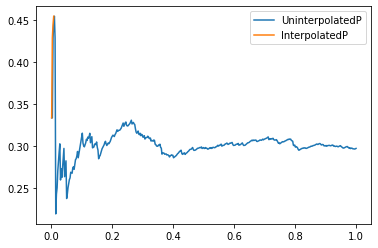

In [29]:
# Create Figure8.2 for topic 301

true_positives1 = 0
precisions1 = []

for i, doc in enumerate(rankedlist):
    if doc in relevantdocs:
        true_positives1 += 1
        precisions1.append((true_positives1 / (i + 1) ))

true_positives2 = 0
precisions2 = []
for i, doc in enumerate(rankedlist):
    if doc in relevantdocs:
        true_positives2 += 1
        precision = true_positives2 / (i + 1)
        if precision > max(precisions2[:i], default=0):
            precisions2.append(precision)



    
# You must calculate the correct precison values for every given recall value here
PR={'UninterpolatedP':{r1:p1 for r1, p1 in zip(Rlevels, precisions1)},'InterpolatedP':{r2:p2 for r2, p2 in zip(Rlevels, precisions2)}}




pd.DataFrame(PR).plot();

In [30]:
assert set(PR.keys())=={'UninterpolatedP', 'InterpolatedP'}
for K in PR:
     assert isinstance(PR[K],dict)
assert_equal(set(PR['UninterpolatedP'].keys()),set(Rlevels))
        



### Cohen's Kappa

Compute the chance $P(E)$ used in the calculation of Cohen's Kappa, using the pooled marginals method.

Your data looks like that given in Exercise 8.10: An array of pairs with binary relevance judgements in which the first column contains the scores of the first judge, etc.

Hint: `numpy` arrays have all kind of handy methods.

In [31]:
# input data size of kappa must be like this
data= np.array([[1,1],[1,0],[0,1],[1,1],[0,0]])

def PE(data):
    '''On input `data`, return the   P(E) (expected agreement).'''
    
    data = np.array(data)
    data = np.array(data)
    judgements = data.size
    P_1 = data.sum() / judgements
    P_0 = (judgements - data.sum()) / judgements
    P_E = P_0**2 + P_1**2
    
    return P_E 

PE(data)

0.52

In [32]:
assert isinstance(PE(data), float)


### 10.1 Creating a test set

Create a test collection in order to evaluate your two search engines (cosine similarity and BM25) on the set of Shakespeare. Create five information needs, which you express as queries. Use multi term queries only. For each information need you specify

 * The information need in natural language
 * The search query
 * A description when a document is considered relevant and when it is not. This should be a very clear description. A person assessing relevance may only use this together with the information need to determine relevance of a document. In particular the judge should not see the query.

YOUR ANSWER HERE

### 10.2 Assess search engine results

Assess for your two search engines, for all five information needs the first 10 results given back by the systems. Let another student do the same task as well.
1. Using your own relevance judgments, compute for each system, the precision at 10 for each query, and the average P@10. Discuss the results.
2. You have now two times at least 50 relevance judgements, and probably more. Compute the kappa measure between the two judges as in exercise 8.10, using pooled marginals as in Table 8.2. Discuss your results and try to explain them.
3. Now compute P@10 for both systems again, once using the relevance judgments of the other assessor, once in which you say that a document is relevant if BOTH judges said it was relevant, and once in which you say that a document is relevant if AT LEAST ONE of the judges said it was relevant.


YOUR ANSWER HERE

# Programming (Inverted Index)

In [33]:
def loadShakespeare():
    if 'shaks200.zip' in os.listdir():
        return 'shaks200.zip'
    elif os.path.exists('../../data/Week3/'):
        return '../../data/Week3/shaks200.zip'
    elif os.path.exists('../../../data/Week3/'):
        return '../../../data/Week3/shaks200.zip'

## 12 Positional inverted index
Adjust your software making an inverted index for the Shakespeare collection: the output should be a positional index. A positional index is an index that also stores the position of the occurrences of a word in a document. The following figure shows an example of a positional index.

<img src="http://nlp.stanford.edu/IR-book/html/htmledition/img121.png" />

Make the index of the form (defaultdicts are also allowed!):
```
{'caesar':   {'files': 
                 {'lll': {'list': [25350], 'total': 1},
                  'm_for_m': {'list': [6773, 14734], 'total': 2},
                  'm_wives': {'list': [3459], 'total': 1},
                  'macbeth': {'list': [9256], 'total': 1},
                  'othello': {'list': [11728], 'total': 1},
                  'rich_ii': {'list': [22695], 'total': 1},
                  'rich_iii': {'list': [16418, 16570, 30799, 30801], 'total': 4},
                  'titus': {'list': [368], 'total': 1},
                  ....
                  },
               'total': 604}....
}
```

In [34]:
def positional_inverted_index(zipfolder):
    # With zipfile we can read the file without opening the zip file
    archive = zipfile.ZipFile(zipfolder, 'r')
    namelist = [x for x in archive.namelist() if '.xml' in x]
    
    for infile in tqdm_notebook(namelist): # loop over each file
        
                
    return positional_index
positional_index = positional_inverted_index(loadShakespeare())
positional_index['ass']

IndentationError: expected an indented block (<ipython-input-34-671579935964>, line 9)

In [ ]:
positional_index = positional_inverted_index(loadShakespeare())
assert type(positional_index) in [dict, defaultdict]
assert_equal(set(positional_index['the'].keys()), {'total','files'})
assert_equal(type(positional_index['the']['total']), int)
assert_equal(set(positional_index['the']['files']['lll'].keys()), {'total','list'})
assert_equal(type(positional_index['the']['files']['lll']['list']), list)
assert_equal(type(positional_index['the']['files']['lll']['total']), int)